In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns


# 1. Plot pearson r2 of different models

## 1.1 Elastic net

### 1.1.1 Compare pearson r2 of train vs test
To show over fitting and find a better threshold

Text(0.5, 1.0, 'Model performance of PC(18:0_20:4)')

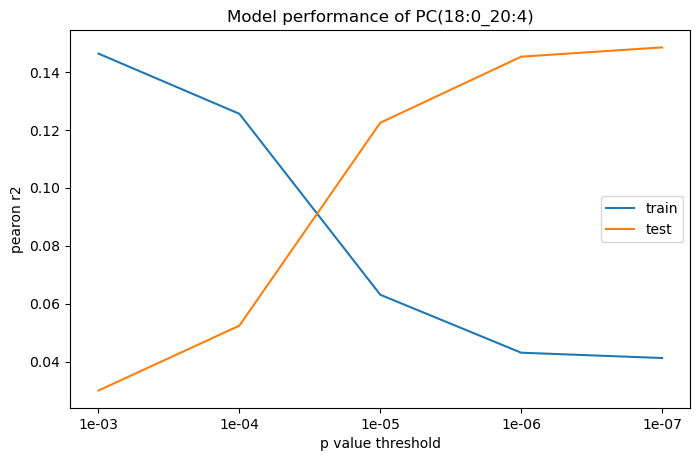

In [132]:
# Plot train and test performance of a single lipid
# PC(18:0_20:4) has the highest pearson r2 in pval 1e-07
# plot performance of train and test of this lipid
lst_threshold = [f'1e-0{x}' for x in range(3, 8)]
lst_threshold_with_maf = [f'1e-0{x}_maf_0.01' for x in range(3, 8)]

reuslt_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/elastic_net/merged_h2_r2'
fn_train = f'merged_h2_r2_train_species_pval_{threshold}.txt'
r2_train, r2_test, r2_train_maf, r2_test_maf = [], [], [], []
lipid = 'PC(18:0_20:4)'
for threshold in lst_threshold:
    fn_train = f'merged_h2_r2_train_species_pval_{threshold}.txt'
    fn_test = f'merged_h2_r2_test_species_pval_{threshold}.txt'
    df_train = pd.read_csv(os.path.join(reuslt_dir, fn_train), sep='\t')
    df_test = pd.read_csv(os.path.join(reuslt_dir, fn_test), sep='\t')
    r2_train.append(df_train[df_train['Lipid']==lipid]['pearson_r2'].values[0])
    r2_test.append(df_test[df_test['Lipid']==lipid]['pearson_r2'].values[0])
    
    # Do the same for MAF fitlered result
    # MAF file seems to have some problem. Values are the same as no MAF result
    # fn_train_maf = f'merged_h2_r2_train_species_pval_{threshold}_maf_0.01.txt'
    # fn_test_maf = f'merged_h2_r2_test_species_pval_{threshold}_maf_0.01.txt'
    # df_train_maf = pd.read_csv(os.path.join(reuslt_dir, fn_train_maf), sep='\t')
    # df_test_maf = pd.read_csv(os.path.join(reuslt_dir, fn_test_maf), sep='\t')
    # r2_train_maf.append(df_train_maf[df_train_maf['Lipid']==lipid]['pearson_r2'].values[0])
    # r2_test_maf.append(df_test_maf[df_test_maf['Lipid']==lipid]['pearson_r2'].values[0])

fig, ax = plt.subplots(figsize=(8,5), dpi=100)
ax.plot(r2_train, label='train')
ax.plot(r2_test, label='test')
ax.legend()
ax.set_xticks(range(5))
ax.set_xticklabels(lst_threshold)
ax.set_xlabel('p value threshold')
ax.set_ylabel('pearon r2')
ax.set_title(f'Model performance of {lipid}')

In [130]:
r2_train

[0.1463231683946309,
 0.1255530411170633,
 0.0631290536164091,
 0.043133094571721,
 0.0412982527586764]

In [131]:
r2_train_maf

[0.1463306411974463,
 0.1256098421793534,
 0.0631290536164091,
 0.043133094571721,
 0.0412982527586764]

In [107]:
r2_train

[0.1463231683946309,
 0.1255530411170633,
 0.0631290536164091,
 0.043133094571721,
 0.0412982527586764]

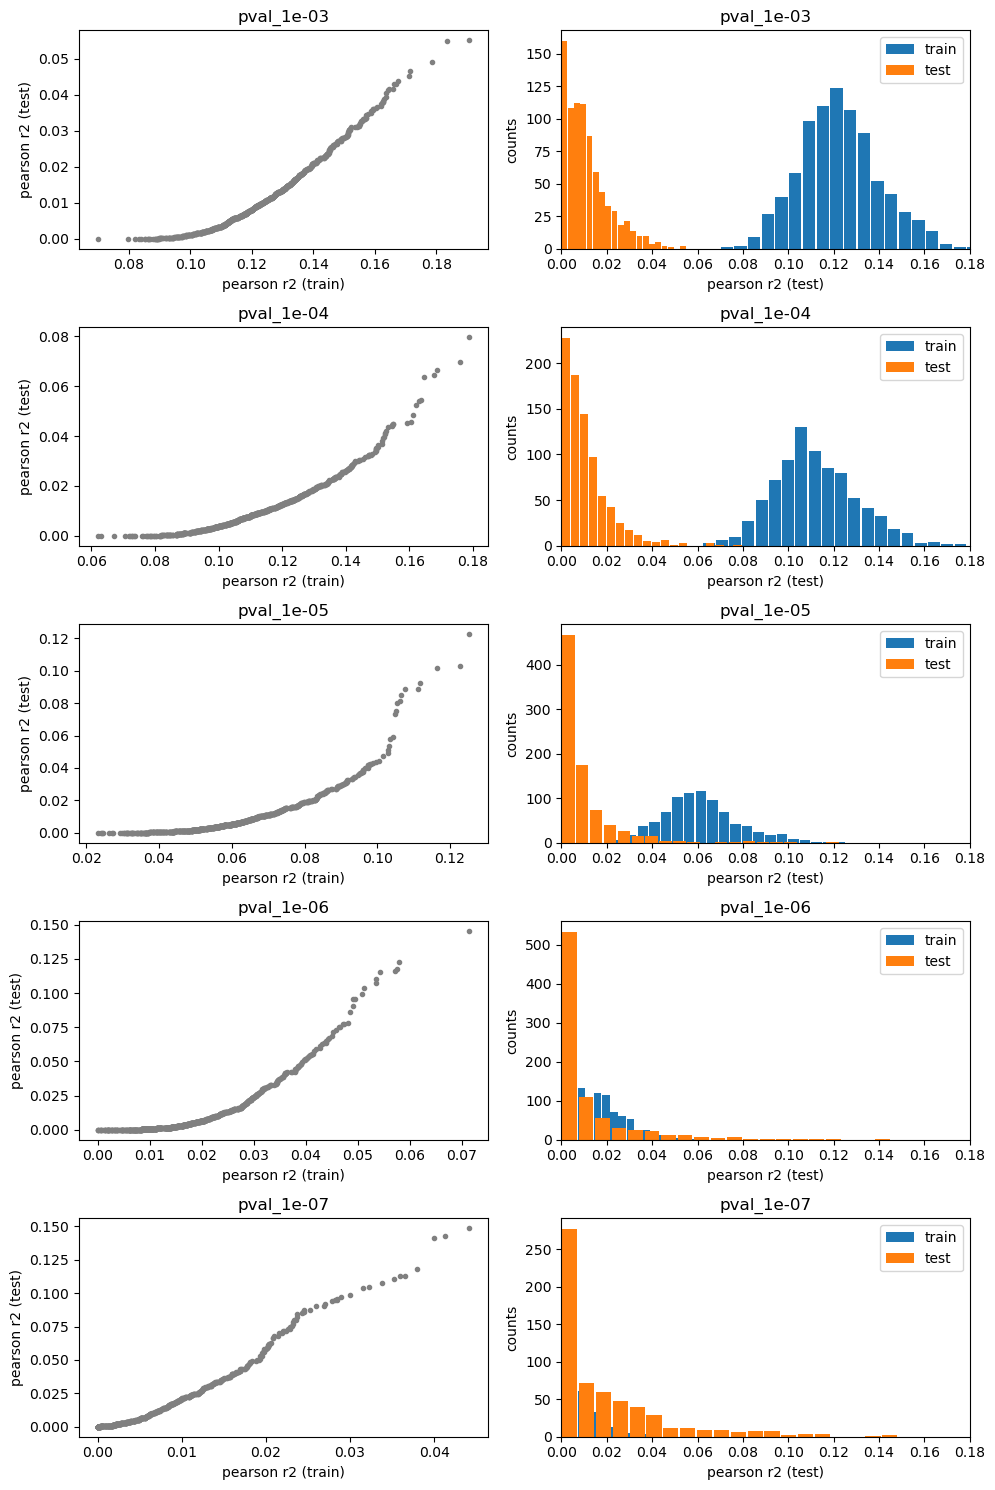

In [94]:

lst_threshold = [f'1e-0{x}' for x in range(3, 8)]
lst_threshold_with_maf = [f'1e-0{x}_maf_0.01' for x in range(3, 8)]
    
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10,15), dpi=100)
r = 0 # Row
for threshold in lst_threshold: 
    reuslt_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/elastic_net/merged_h2_r2'
    fn_train = f'merged_h2_r2_train_species_pval_{threshold}.txt'
    fn_test = f'merged_h2_r2_test_species_pval_{threshold}.txt'
    df_train = pd.read_csv(os.path.join(reuslt_dir, fn_train), sep='\t').sort_values(by='pearson_r2').set_index(keys='Lipid')
    df_test = pd.read_csv(os.path.join(reuslt_dir, fn_test), sep='\t').sort_values(by='pearson_r2').set_index(keys='Lipid')
    ax[r,0].plot(df_train['pearson_r2'], df_test['pearson_r2'], ls='', marker='.', c='grey')
    ax[r,0].set_xlabel('pearson r2 (train)')
    ax[r,0].set_ylabel('pearson r2 (test)')
    ax[r,0].set_title(f'pval_{threshold}')
    
    ax[r,1].hist(df_train['pearson_r2'], bins=20, rwidth=0.9, label='train')
    ax[r,1].hist(df_test['pearson_r2'], bins=20, rwidth=0.9, label='test')
    ax[r,1].set_xlabel('pearson r2 (test)')
    ax[r,1].set_ylabel('counts')
    ax[r,1].set_title(f'pval_{threshold}')
    ax[r,1].set_xlim(0, 0.18)
    ax[r,1].legend()
    r += 1
fig.tight_layout()
# fig.suptitle(f'pval_{threshold}')

### 1.1.2 Compare r2 of different pval threshold models

Text(0.5, 0, 'p value threshold')

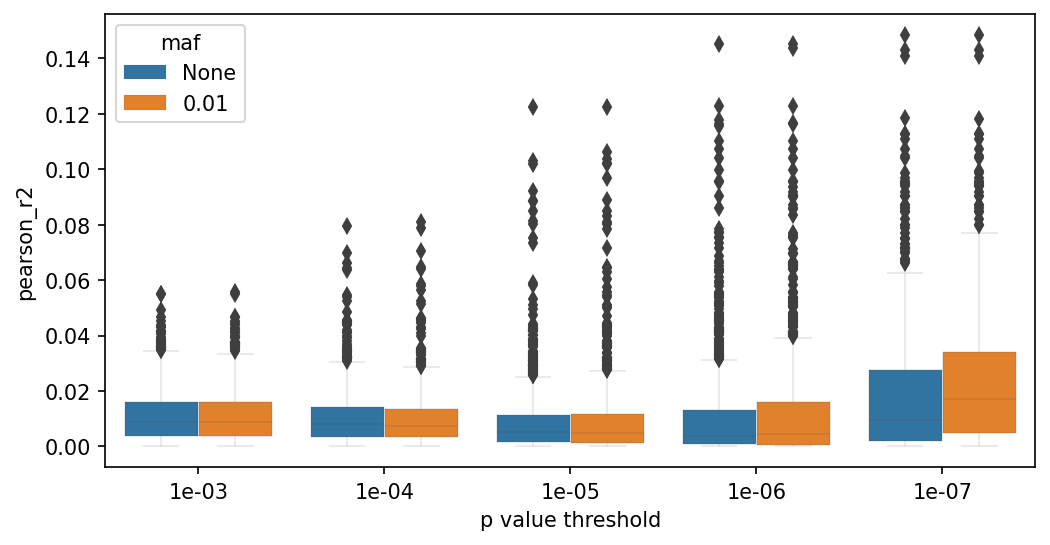

In [62]:
# Compare model performance with different SNP filtering criteria
lip_type = 'species'

lst_threshold = [f'1e-0{x}' for x in range(3, 8)]
lst_threshold_with_maf = [f'1e-0{x}_maf_0.01' for x in range(3, 8)]
fig, ax = plt.subplots(figsize=(8,4), dpi=150)
# Load h2 and pearson R2
reuslt_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/elastic_net/merged_h2_r2'
lst_reuslt = []
for threshold in lst_threshold:
    resutlt_fn = f'merged_h2_r2_test_{lip_type}_pval_{threshold}.txt'
    df = pd.read_csv(os.path.join(reuslt_dir, resutlt_fn), sep='\t').sort_values(by='pearson_r2')
    df['threshold'] = threshold
    df['maf'] = 'None'
    # display(df.head())
    lst_reuslt.append(df)
for threshold in lst_threshold_with_maf:
    resutlt_fn = f'merged_h2_r2_test_{lip_type}_pval_{threshold}.txt'
    df = pd.read_csv(os.path.join(reuslt_dir, resutlt_fn), sep='\t').sort_values(by='pearson_r2')
    df['threshold'] = threshold.split('_maf_0.01')[0]
    df['maf'] = '0.01'
    # display(df.head())
    lst_reuslt.append(df)

df_all = pd.concat(lst_reuslt) # Merge all results
sns.boxplot(data=df_all, x='threshold', y='pearson_r2', hue='maf',
            linewidth=0.1, ax=ax)
ax.set_xlabel('p value threshold')

## 1.2 AdaBoost

### 1.2.1 Get pearson r2 of test run result


In [206]:
# Load AdaBoost result
result_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/AdaBoost/species/pval_1e-05'
lst_lipid, lst_r2, c = [], [], 0
for fn in os.listdir(result_dir):
    if fn.endswith('.log'):
        # Extract pearson r2 from log files
        # Already applied model on test set during training
        lipid = fn.split('.2024')[0]
        lst_lipid.append(lipid)
        with open(os.path.join(result_dir, fn)) as fh:
            for line in fh:
                if 'Pearson r2' in line:
                    r2 = line.strip().split(': ')[-1]
                    lst_r2.append(r2)
        c+=1
        print(f'\r# Processed {c}', end='', flush=True)
df_adb_r2 = pd.DataFrame({'Lipid_name':lst_lipid, 'pearson_r2':lst_r2})
df_adb_r2['pearson_r2'] = df_adb_r2['pearson_r2'].astype('float')


# Load elstic net result
reuslt_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/elastic_net/merged_h2_r2'
threshold = '1e-05'
resutlt_fn = f'merged_h2_r2_test_{lip_type}_pval_{threshold}.txt'
# Reorder lipids
# Sort by heritability
df_elastic_net_r2 = pd.read_csv(os.path.join(reuslt_dir, resutlt_fn), sep='\t').sort_values(by='h2')
df_adb_r2 = df_adb_r2.set_index(keys='Lipid_name').reindex(labels=df_elastic_net_r2['Lipid_name']).reset_index()

print('\n# Numver of lipids pass in AdaBoost r2>0.05:',len(df_adb_r2[df_adb_r2['pearson_r2']>=0.05]))
print('# Numver of lipids pass in Elastic net r2>0.05:',len(df_elastic_net_r2[df_elastic_net_r2['pearson_r2']>=0.05]))

# Processed 830
# Numver of lipids pass in AdaBoost r2>0.05: 70

# Numver of lipids pass in Elastic net r2>0.05: 15


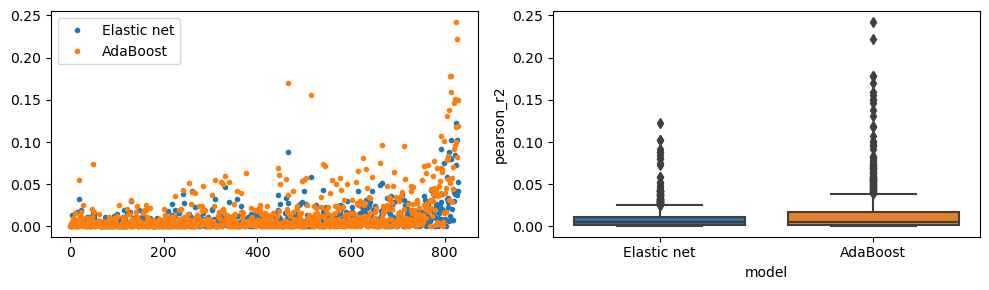

In [202]:
# Plot AdaBoost and Elastic net
fig, ax = plt.subplots(ncols=2, figsize=(10, 3), dpi=100)
ax[0].plot(df_elastic_net_r2['pearson_r2'].values, ls='', marker='.', label='Elastic net')
ax[0].plot(df_adb_r2['pearson_r2'].astype('float'), ls='', marker='.', label='AdaBoost')
ax[0].legend()
df_adb_r2['model']='AdaBoost'
df_elastic_net_r2['model'] = 'Elastic net'
df_merged = pd.concat([df_elastic_net_r2[['Lipid_name', 'pearson_r2', 'model']], df_adb_r2])
df_merged['pearson_r2'] = df_merged['pearson_r2'].astype('float')
sns.boxplot(data=df_merged, x="model", y="pearson_r2", ax=ax[1])
fig.tight_layout()

In [197]:
df_merged 

,Lipid_name,pearson_r2,model
0,CE-18:2-,0.000497,NaN
137,PC-18:0_18:1-,0.0,NaN
138,TG-50:0-_[NL-18:0],0.002675,NaN
139,PE-P-18:0-22:5-_-n6-,0.001196,NaN
140,PE-O-16:0-22:6-,0.005595,NaN
...,...,...,...
825,PC-18:0_20:4-,0.2428,AdaBoost
826,PC-16:0_20:4-,0.2224,AdaBoost
827,DE-20:4-,0.0820,AdaBoost
828,CE-20:4-,0.1190,AdaBoost


In [145]:
df_merged = df_adb_r2.merge(df_)

,Lipid_name,AdaBoost_r2
0,PE-P-16:0-22:5-_-n3-,0.0082
1,SM-d18:1-14:0--SM-d16:1-16:0-,0.0105
2,TG-50:2-_[NL-14:0],0.0165
3,PI-16:0_20:4-,0.0031
4,SM-43:2-_-c-,0.0106
...,...,...
825,LPC-22:5-_-n3-_[sn1]_[104_sn1],0.0839
826,PE-18:0_22:6-,0.0374
827,SM-d18:1-22:0--SM-d16:1-24:0-,0.0007
828,LPC-P-16:0-,0.0201


In [141]:
df

,Lipid_name,h2,se,95CI,Lipid,pearson_r2,pearson_pval,model_fitting_r2,threshold,maf
148,LPE-17:0-,0.068050,0.184686,0.361985,LPE(17:0),4.675373e-07,9.857898e-01,-0.023494,1e-07,0.01
275,TG-56:7-_[NL-22:6],0.218864,0.187494,0.367488,TG(56:7) [NL-22:6],2.968467e-06,9.642039e-01,-0.022990,1e-07,0.01
196,Cer-d18:1-16:0-,0.127580,0.187130,0.366775,Cer(d18:1/16:0),7.745597e-06,9.422086e-01,-0.047669,1e-07,0.01
45,PC-O-18:0-18:1-,0.000001,0.188073,0.368623,PC(O-18:0/18:1),9.254683e-06,9.368399e-01,-0.024074,1e-07,0.01
89,PE-P-18:0-18:3-,0.007354,0.188487,0.369435,PE(P-18:0/18:3),1.073668e-05,9.319820e-01,-0.022524,1e-07,0.01
...,...,...,...,...,...,...,...,...,...,...
461,PC-38:5-_-a-,0.880222,0.182675,0.358043,PC(38:5) (a),1.125170e-01,2.268167e-19,0.080376,1e-07,0.01
215,Hex3Cer-d18:1-22:0-,0.146955,0.192921,0.378125,Hex3Cer(d18:1/22:0),1.182033e-01,2.497459e-20,0.039136,1e-07,0.01
466,PC-16:0_20:4-,0.976646,0.179809,0.352426,PC(16:0_20:4),1.408484e-01,3.344747e-24,0.093815,1e-07,0.01
242,Cer-d19:1-24:1-,0.173503,0.198225,0.388521,Cer(d19:1/24:1),1.429762e-01,1.430725e-24,0.133656,1e-07,0.01
